<a href="https://colab.research.google.com/github/sowmyarshetty/Project2-AI-Class/blob/main/Project2_AI_LungCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lung Cancer Prediction & Analysis


## Overview
-This project analyzes a lung cancer dataset using **classification, regression, and clustering**.

**We aim to**:
- Predict lung cancer diagnosis using **classification**
- Predict lung cancer diagnosis using **logistic regression, Decision Tree , RandomForestClassifer**
- Identify clusters of patients based on risk factors using **K-Means clustering**

## Import Libraries

In [97]:

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import gdown

# Suppress warnings for clarity
import warnings
warnings.filterwarnings('ignore')


##Load Dataset

In [98]:

# Mount Google Drive (For Colab Users)
from google.colab import drive
drive.mount('/content/drive')


#URL for downloading lung cancer data
url_lc = 'https://drive.google.com/uc?id=1qQSYbhrUczPKIj22h0AC2f9rT4ljI3BC'
gdown.download(url_lc, 'lung_cancer_prediction_dataset.csv', quiet=False)


#Read the Lung cancer data.csv
data = pd.read_csv(url_lc)
data.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading...
From: https://drive.google.com/uc?id=1qQSYbhrUczPKIj22h0AC2f9rT4ljI3BC
To: /content/lung_cancer_prediction_dataset.csv
100%|██████████| 23.5M/23.5M [00:00<00:00, 116MB/s]


,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


# Display basic info

In [99]:
print("Dataset Shape:", data.shape)

Dataset Shape: (220632, 24)


In [100]:
display(data.head())

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [101]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Cancer_Stage                 8961 non-null    object 
 12  Survival_Years               220632 non-null  int64  
 13 

# Exploratory Data Analysis (EDA)

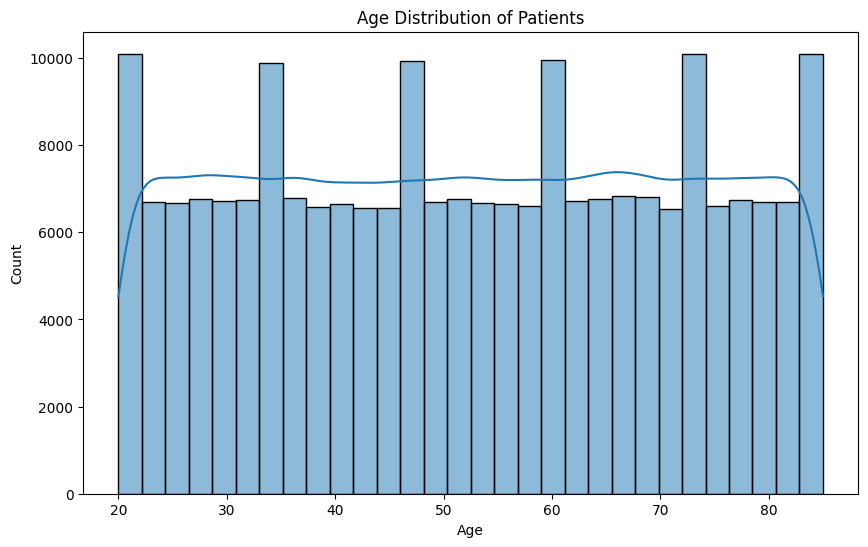

In [102]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

###Observations:

The dataset covers a wide age range (20-85 years) with Uniform Age Spread with Periodic Spikes. The spikes at regular intervals suggest possible grouped data collection.

No significant skewness, implying age alone may not be the primary risk factor.


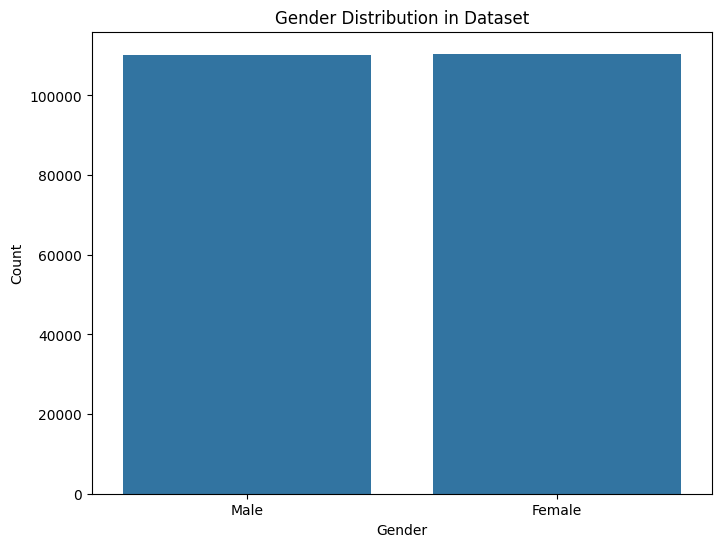

In [103]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution in Dataset")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## Observation:

The dataset contains an almost equal number of male and female patients.

This balanced gender distribution ensures that gender-related insights are unbiased.

# Distribution of Target Variable (Lung Cancer Diagnosis)

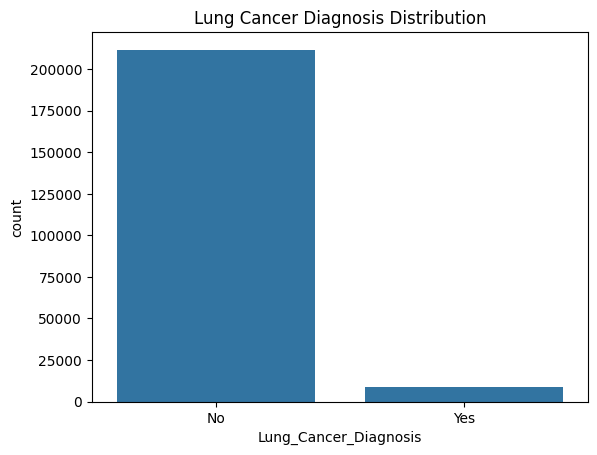

In [104]:
# Distribution of Target Variable (Lung Cancer Diagnosis)
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=data['Lung_Cancer_Diagnosis'])
plt.title("Lung Cancer Diagnosis Distribution")
plt.show()

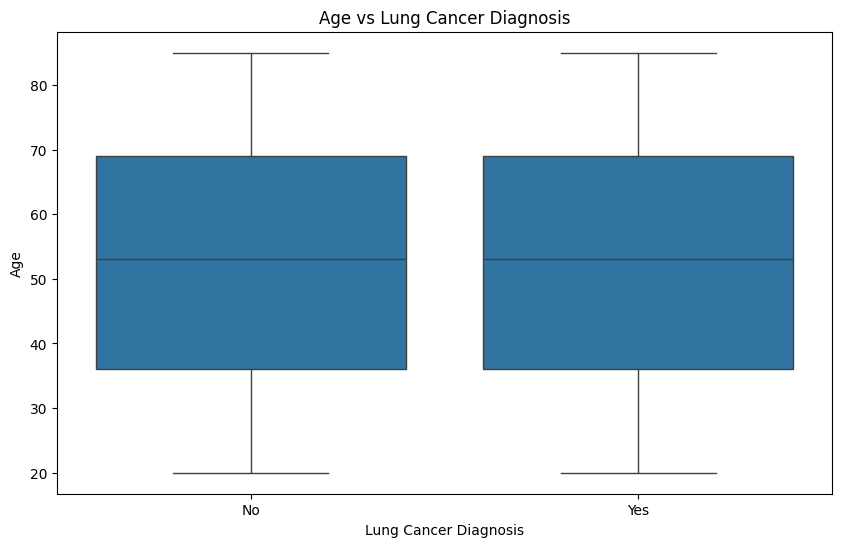

In [105]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Lung_Cancer_Diagnosis', y='Age', data=data)
plt.title("Age vs Lung Cancer Diagnosis")
plt.xlabel("Lung Cancer Diagnosis")
plt.ylabel("Age")
plt.show()

##Observation:

The age distribution is similar for both diagnosed and non-diagnosed patients.

The median age for both groups is around 50-55 years.

No significant outliers, suggesting lung cancer affects a broad age range.

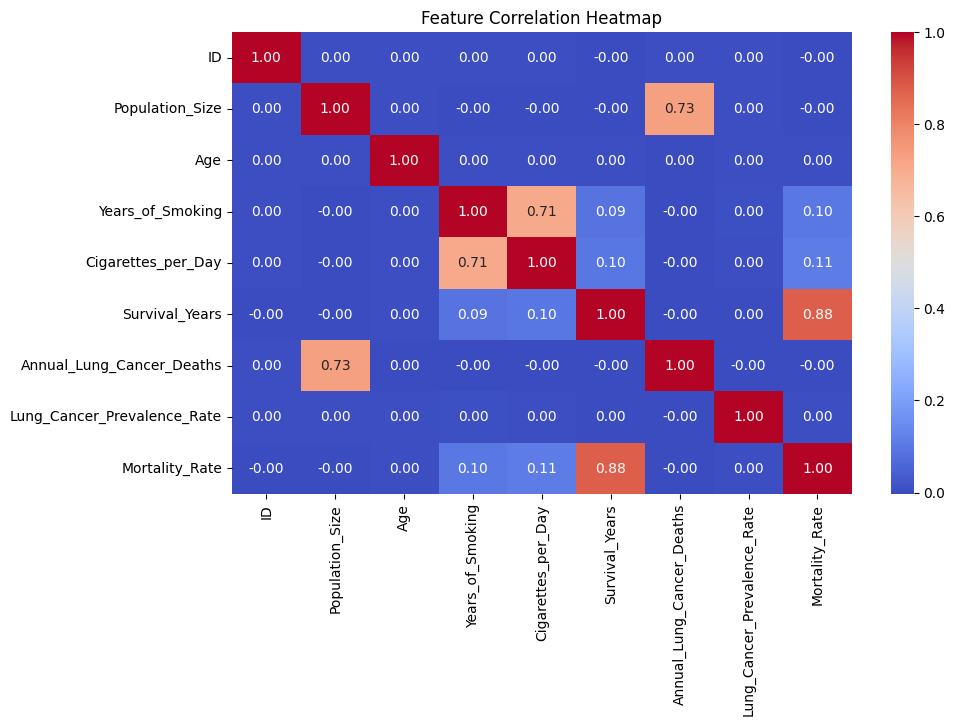

In [106]:
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f') # Select only numerical features for correlation
plt.title("Feature Correlation Heatmap")
plt.show()

##Observation:
The correlation heatmap helps identify relationships between numerical features, offering insights into potential predictors for lung cancer.

**Strong Positive Correlations**:

Years of Smoking vs. Cigarettes per Day (0.71):

Indicates that longer smoking duration tends to result in a higher number of cigarettes consumed daily.

This suggests that both factors should be considered together when assessing smoking-related lung cancer risk.

Population Size vs. Annual Lung Cancer Deaths (0.73):

Larger populations tend to report higher absolute lung cancer deaths.
However, this may not reflect an increased prevalence rate, just a larger affected population.

Survival Years vs. Mortality Rate (0.88):

Higher mortality rates correlate with shorter survival times, which is expected.
This supports the importance of early detection and better treatment access.
Moderate or Weak Correlations:

Years of Smoking vs. Survival Years (0.09):

Surprisingly weak correlation suggests that other factors, such as treatment type and genetic predisposition, play a significant role in survival.

Cigarettes per Day vs. Mortality Rate (0.11):

Weak correlation, indicating that mortality is influenced by multiple factors, not just smoking.


Key Takeaways for Predictive Modeling:

Strong predictors for mortality and survival include mortality rate, smoking habits, and population size.

## Data Preprocessing

In [107]:
# Convert categorical values into numerical using Label Encoding
categorical_cols = ["Gender", "Smoker", "Passive_Smoker", "Family_History", "Lung_Cancer_Diagnosis",
                    "Cancer_Stage", "Adenocarcinoma_Type", "Air_Pollution_Exposure",
                    "Occupational_Exposure", "Indoor_Pollution", "Healthcare_Access", "Early_Detection",
                    "Treatment_Type", "Developed_or_Developing"]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

 # Drop non-relevant columns
data.drop(columns=["ID", "Country"], inplace=True)
print("Data after preprocessing:")
display(data.head())


Data after preprocessing:


,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Cancer_Stage,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,1400,80,1,1,30,29,0,0,0,4,...,1,1,0,1,0,3,1,690000,2.44,0.0
1,84,53,1,0,0,0,1,0,0,4,...,1,1,0,1,0,3,1,27000,2.10,0.0
2,128,47,1,1,12,6,1,0,0,4,...,2,0,0,1,1,3,1,28000,1.11,0.0
3,273,39,0,0,0,0,0,1,0,4,...,1,0,0,1,0,3,1,40000,0.75,0.0
4,59,44,0,0,0,0,1,0,0,4,...,2,1,0,1,0,3,1,15000,2.44,0.0


## Exploratory Data Analysis

##Logistic Regression Model - for Classification


*   First Run - Accuracy Score of the Logistic Regression Model is 100% when we dropped only the 2 columns "Survival_Years","Lung_Cancer_Diagnosis".  We removed Survival Years to reduce redundancy between Mortality_Rate
   

In [108]:
# Define target and features
X = data.drop(columns=["Survival_Years","Lung_Cancer_Diagnosis"])
y = data["Lung_Cancer_Diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
# Predictions
y_pred = log_model.predict(X_test)


#look at the adjusted R2 score if we have imbalance class in training dataset

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42292
           1       1.00      1.00      1.00      1835

    accuracy                           1.00     44127
   macro avg       1.00      1.00      1.00     44127
weighted avg       1.00      1.00      1.00     44127



*   Second Run - Accuracy Score of the Logistic Regression Model is 98% when we dropped the highly co-related columns "Survival_Years","Lung_Cancer_Diagnosis","Mortality_Rate","Adenocarcinoma_Type","Cancer_Stage"



In [125]:

# Define target and features
X = data.drop(columns=["Survival_Years","Lung_Cancer_Diagnosis","Mortality_Rate","Adenocarcinoma_Type","Cancer_Stage"])
y = data["Lung_Cancer_Diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
#log_model = LogisticRegression()
log_model = LogisticRegression(C=0.1, penalty='l2', max_iter=1000)

log_model.fit(X_train, y_train)
# Predictions
y_pred = log_model.predict(X_test)


# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9820291431549845
Classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99     42292
           1       1.00      0.57      0.72      1835

    accuracy                           0.98     44127
   macro avg       0.99      0.78      0.86     44127
weighted avg       0.98      0.98      0.98     44127



**Explanation of Logistic Regression Results - First Run**

The Logistic Regression model has achieved 100% accuracy on the test dataset in the first run when we dropped only 2 columns "Survival_Years" and "Lung_Cancer_Diagnosis". Let's break down the key evaluation metrics:

1. Accuracy = 1.00 (100%)
This means that all predictions made by the model were correct.Since the model achieved 1.00, there were no misclassifications.

2. Precision, Recall, and F1-Score = 1.00
These scores are 1.00 for both classes (0 = No Lung Cancer, 1 = Lung Cancer), meaning:

Precision (1.00):
Every patient predicted to have lung cancer actually had lung cancer.
No false positives (incorrect lung cancer diagnoses).

Recall (1.00):
The model successfully identified all lung cancer cases in the dataset.
No false negatives (missed lung cancer cases).

F1-Score (1.00):
Since both precision and recall are perfect, the F1-score, which is their harmonic mean, is also perfect.

-3. Class Distribution & Support
Class 0 (No Lung Cancer): 42,292 patients
Class 1 (Lung Cancer): 1,835 patients
Despite the class imbalance, the model correctly classified all cases.

**Explanation of Logistic Regression Results - Second Run**
The Logistic Regression model has achieved 98% accuracy on the test dataset in the second run when we dropped highly co-related columns "Survival_Years","Lung_Cancer_Diagnosis","Mortality_Rate","Adenocarcinoma_Type","Cancer_Stage"

Overall Accuracy is High (98%)
The model correctly classifies 98% of all cases.
This indicates strong general performance but needs further verification for minority class predictions.

Perfect Precision for Lung Cancer Cases (Class 1) (1.00)

Every predicted positive (Lung Cancer) case is actually a true positive.
There are zero false positives, meaning no incorrect lung cancer diagnoses.

Recall for Lung Cancer Cases is 57%
The model fails to detect 43% of actual lung cancer cases.
This means it is still missing a significant number of positive cases.

Class 0 (No Lung Cancer) is Predicted Almost Perfectly
Precision = 0.98 and Recall = 1.00, meaning nearly all non-cancer cases are correctly classified.

Macro F1 Score is 0.86, Weighted F1 Score is 0.98
The weighted F1 score is higher due to the dominance of Class 0.
Macro F1 score is lower, indicating that the model performs better on Class 0 than Class 1.



# Applied Cross Validation to check if our model was over-fitting

In [110]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import make_classification

X = data.drop(columns=["Survival_Years","Lung_Cancer_Diagnosis","Mortality_Rate","Adenocarcinoma_Type","Cancer_Stage"])
y = data["Lung_Cancer_Diagnosis"]

# Define k-fold cross-validation
k = 5  # Number of folds

kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
accuracies = cross_val_score(log_model, X, y, cv=kf, scoring='accuracy')
# Print results
print(f'Accuracy for each fold: {accuracies}')
print(f'Mean Accuracy: {np.mean(accuracies):.4f}')
print(f'Standard Deviation: {np.std(accuracies):.4f}')

Accuracy for each fold: [0.98205181 0.98277698 0.98221003 0.98334315 0.98248198]
Mean Accuracy: 0.9826
Standard Deviation: 0.0005


# Observation of Cross Validation
*   The accuracy for each fold is approximately the same and this shows that the model is not overfitting




## Classification - Random Forest Classifier Model

*   #Accuracy Score of the Random Forest Classifier Model is 100% when we dropped only the 2 columns "Survival_Years","Lung_Cancer_Diagnosis"



In [111]:
# Define target and features
X_reg = data.drop(columns=["Survival_Years","Lung_Cancer_Diagnosis"])
y_reg = data["Lung_Cancer_Diagnosis"]

# Train-test split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(Xr_train)
Xr_train_scaled = scaler.transform(Xr_train)

# Transform the test dataset based on the fit from the training dataset
Xr_test_scaled = scaler.transform(Xr_test)

# Train Random Forest Classifier
rf_reg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reg.fit(Xr_train_scaled, yr_train)

# Predictions
y_pred_reg = rf_reg.predict(Xr_test_scaled)


# Evaluation
print("Random Forest Classifier Accuracy:", accuracy_score(yr_test, y_pred_reg))
print("Classification Report:", classification_report(yr_test, y_pred_reg))


Random Forest Classifier Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42292
           1       1.00      1.00      1.00      1835

    accuracy                           1.00     44127
   macro avg       1.00      1.00      1.00     44127
weighted avg       1.00      1.00      1.00     44127



## Classification - Random Forest Classifier Model


* Accuracy Score of the Random Forest Classifier Model is 98% when we dropped
  only the highly co-related columns "Survival_Years","Lung_Cancer_Diagnosis","Mortality_Rate","Adenocarcinoma_Type","Cancer_Stage"




In [112]:
# Define target and features
X_reg = data.drop(columns=["Survival_Years","Lung_Cancer_Diagnosis","Mortality_Rate","Adenocarcinoma_Type","Cancer_Stage"])
y_reg = data["Lung_Cancer_Diagnosis"]

# Train-test split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(Xr_train)
Xr_train_scaled = scaler.transform(Xr_train)

# Transform the test dataset based on the fit from the training dataset
Xr_test_scaled = scaler.transform(Xr_test)
Xr_test_scaled


# Train Random Forest Classifier
rf_reg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reg.fit(Xr_train_scaled, yr_train)

# Predictions
y_pred_reg = rf_reg.predict(Xr_test_scaled)


# Evaluation
print("Random Forest Classifier Accuracy:", accuracy_score(yr_test, y_pred_reg))
print("Classification Report:", classification_report(yr_test, y_pred_reg))



Random Forest Classifier Accuracy: 0.9890316586217055
Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99     42292
           1       1.00      0.74      0.85      1835

    accuracy                           0.99     44127
   macro avg       0.99      0.87      0.92     44127
weighted avg       0.99      0.99      0.99     44127



In [113]:
# Get the feature importance array
feature_importances = rf_reg.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(feature_importances, X_reg.columns), reverse=True)
importances_sorted[:10]


[(0.7174025375211114, 'Treatment_Type'),
 (0.07116814711921741, 'Lung_Cancer_Prevalence_Rate'),
 (0.05425555159545067, 'Age'),
 (0.032957355526651404, 'Years_of_Smoking'),
 (0.028301836700054067, 'Cigarettes_per_Day'),
 (0.02220454727335699, 'Annual_Lung_Cancer_Deaths'),
 (0.019430701640313977, 'Population_Size'),
 (0.0116612029001261, 'Air_Pollution_Exposure'),
 (0.006631321105725109, 'Occupational_Exposure'),
 (0.006621671933710904, 'Passive_Smoker')]

# Decision Tree Model

In [114]:
# Create the decision tree classifier instance
from sklearn import tree
dtmodel = tree.DecisionTreeClassifier()


# Define target and features
X_reg = data.drop(columns=["Survival_Years","Lung_Cancer_Diagnosis"])
y_reg = data["Lung_Cancer_Diagnosis"]

# Train-test split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(Xr_train)
Xr_train_scaled = scaler.transform(Xr_train)

# Transform the test dataset based on the fit from the training dataset
Xr_test_scaled = scaler.transform(Xr_test)


# Fit the model
dtmodel = dtmodel.fit(Xr_train_scaled, y_train)

dtpredictions = dtmodel.predict(Xr_test_scaled)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, dtpredictions)

print(f"Decision Tree Model Accuracy Score : {acc_score}")

Decision Tree Model Accuracy Score : 1.0


# Visualizing the Decision Tree

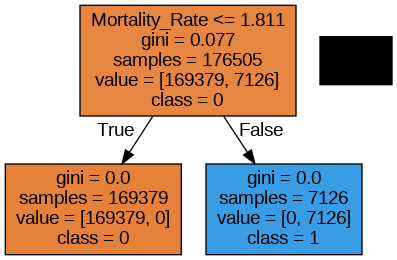

In [115]:
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(
    dtmodel, out_file=None, feature_names=X_reg.columns, class_names=["0", "1"], filled=True, max_depth=5
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# Exploring Decision Tree Model by removing Adenocarcinoma_Type , Cancer_Stage ,Survival_Years from the training dataset

In [116]:
# Define target and features
Xdt2_reg = data.drop(columns=["Mortality_Rate","Lung_Cancer_Diagnosis","Adenocarcinoma_Type","Cancer_Stage","Survival_Years"])
ydt2_reg = data["Lung_Cancer_Diagnosis"]

# Train-test split
Xdt2_train, Xdt2_test, ydt2_train, ydt2_test = train_test_split(Xdt2_reg, ydt2_reg, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(Xdt2_train)
Xdt2_train_scaled = scaler.transform(Xdt2_train)

# Transform the test dataset based on the fit from the training dataset
Xdt2_test_scaled = scaler.transform(Xdt2_test)

# Create the decision tree classifier instance
dtmodel2 = tree.DecisionTreeClassifier()

# Fit the model
dtmodel2 = dtmodel2.fit(Xdt2_train_scaled, ydt2_train)

dt2predictions = dtmodel2.predict(Xdt2_test_scaled)

# Calculate the accuracy score
dt2acc_score = accuracy_score(ydt2_test, dt2predictions)

print(f"Decision Tree Model Accuracy Score : {dt2acc_score}")


Decision Tree Model Accuracy Score : 0.9749133183765042


In [117]:
Xdt2_reg.head(5)

,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate
0,1400,80,1,1,30,29,0,0,1,1,0,1,0,3,1,690000,2.44
1,84,53,1,0,0,0,1,0,1,1,0,1,0,3,1,27000,2.10
2,128,47,1,1,12,6,1,0,2,0,0,1,1,3,1,28000,1.11
3,273,39,0,0,0,0,0,1,1,0,0,1,0,3,1,40000,0.75
4,59,44,0,0,0,0,1,0,2,1,0,1,0,3,1,15000,2.44


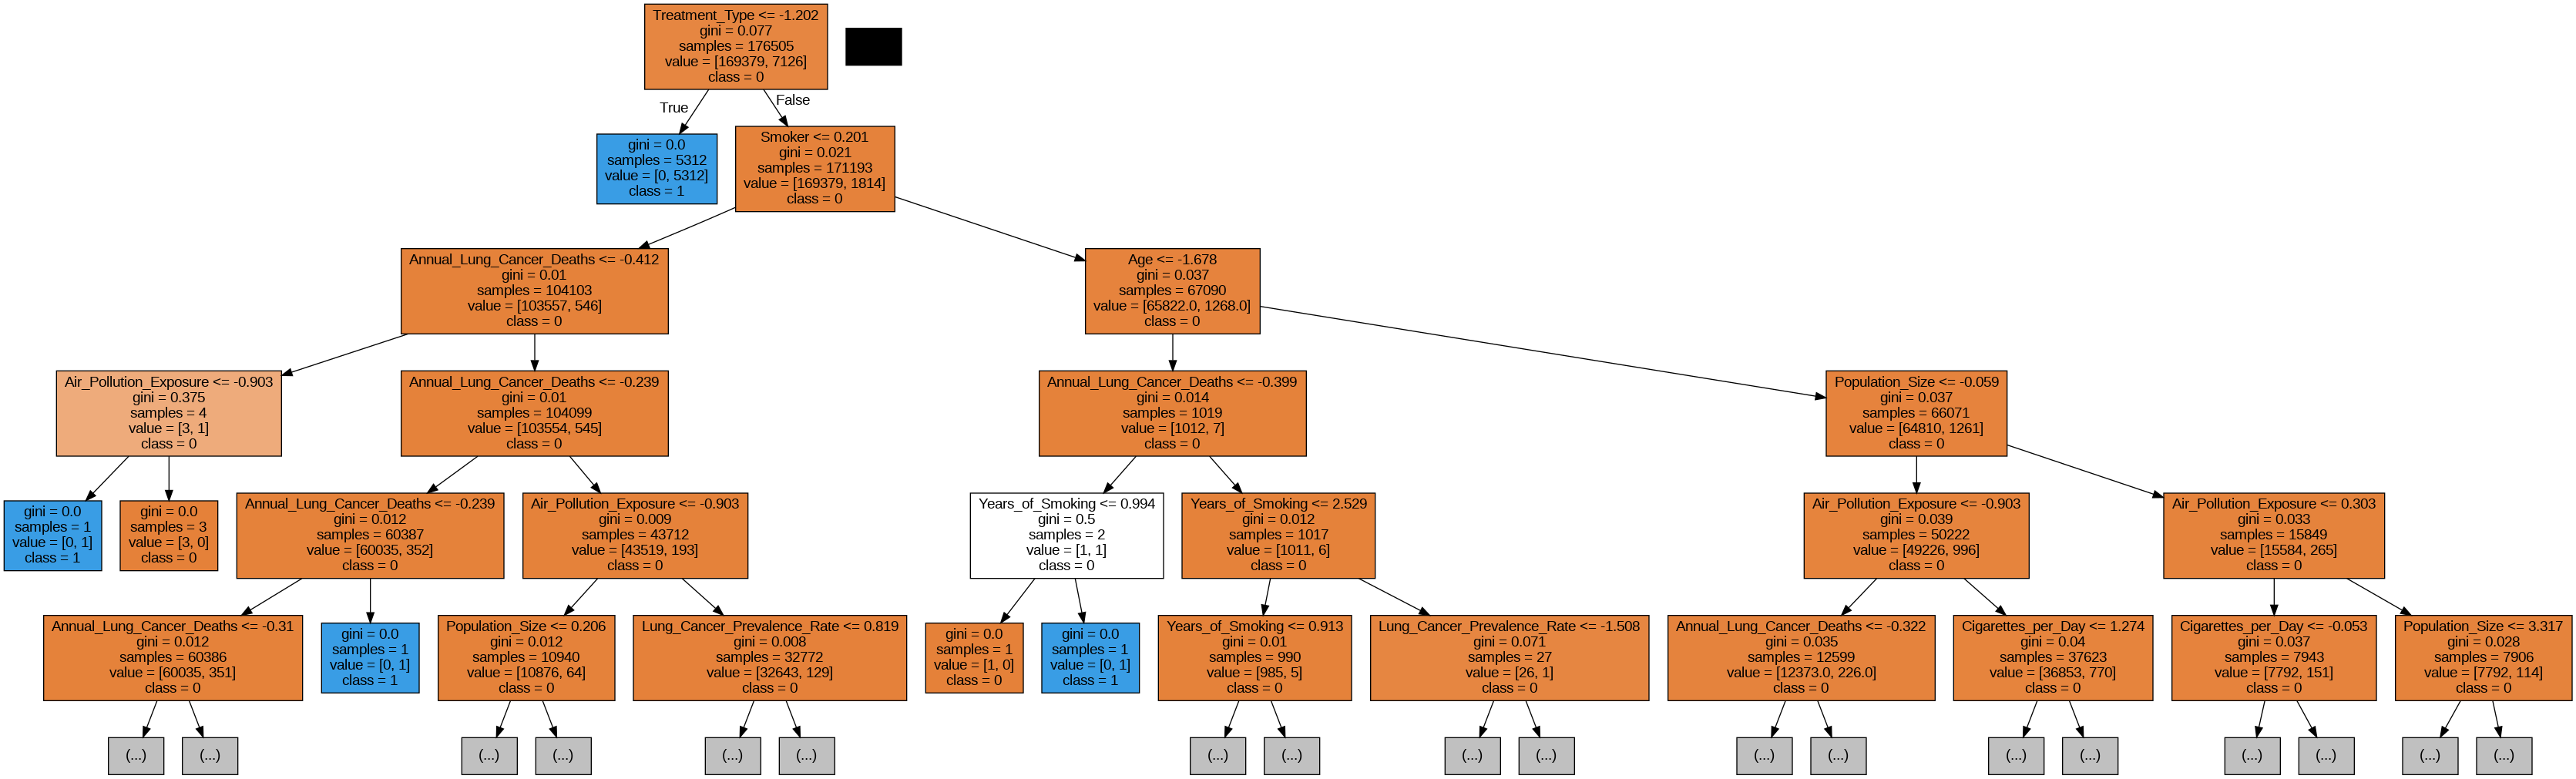

In [118]:
# Needed for decision tree visualization

# Create DOT data
dot_data2 = tree.export_graphviz(
    dtmodel2, out_file=None, feature_names=Xdt2_reg.columns, class_names=["0", "1"], filled=True, max_depth=5
)

# Draw graph
graph2 = pydotplus.graph_from_dot_data(dot_data2)

# Show graph
Image(graph2.create_png())

*   The accuracy score of the Decision Tree Model =  0.9744147574047636



##Clustering: K-Means with Elbow Method

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

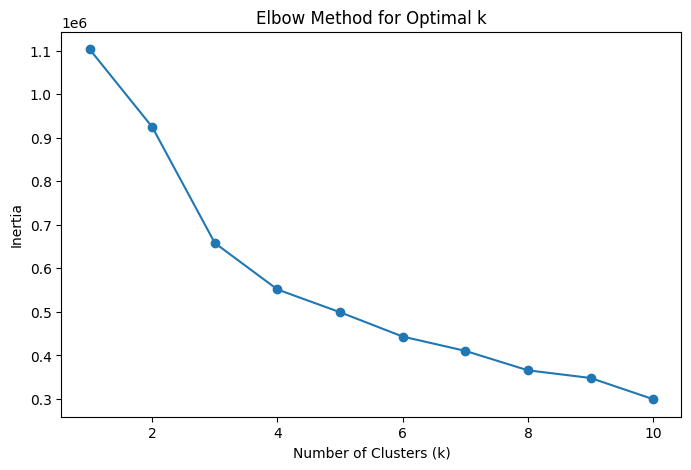

In [123]:
# Select relevant features for clustering
cluster_features = ["Age", "Years_of_Smoking", "Cigarettes_per_Day", "Air_Pollution_Exposure", "Occupational_Exposure"]
X_cluster = data[cluster_features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Elbow method to determine optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()



Finding the Optimal Number of Clusters (K) The "elbow" point is where the rate of inertia reduction slows down significantly.

Looking at the plot, the elbow appears at k = 3 or k = 4, meaning:

Before this point, adding clusters significantly reduces inertia.

After this point, adding more clusters has diminishing returns (minor improvements in cluster quality but increased complexity

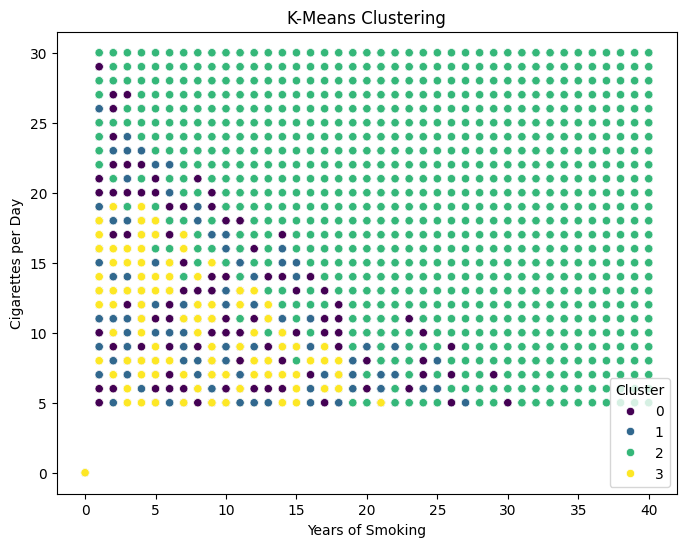

In [124]:
# Fit K-Means with optimal k (assumed k=4 from the elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
data["Cluster"] = kmeans.fit_predict(X_scaled)
# Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=data["Years_of_Smoking"], y=data["Cigarettes_per_Day"], hue=data["Cluster"], palette="viridis")
plt.xlabel("Years of Smoking")
plt.ylabel("Cigarettes per Day")
plt.title("K-Means Clustering")
plt.show()

Explanation of K-Means Clustering Visualization:

This scatter plot represents K-Means Clustering based on Years of Smoking
(X-axis) and Cigarettes per Day (Y-axis). The different colors represent different clusters.

** What the Clusters Represent**

Cluster 0 (Dark Purple):
Light smokers or new smokers (few years of smoking, fewer cigarettes per day).
Includes individuals with low smoking exposure.

Cluster 1 (Teal/Blue-Green):
Moderate smokers (mid-range years of smoking, medium cigarette consumption).
Likely individuals with some smoking-related risks but not extreme.

Cluster 2 (Yellow):
Heavy smokers (long history of smoking, high daily cigarette consumption).
Likely high-risk individuals for lung cancer and smoking-related diseases.


**Observations**

Most data points fall into Cluster 2 (yellow), indicating a large group of heavy smokers.
Cluster 0 (dark purple) is concentrated in the lower-left region, representing beginners or occasional smokers.
Cluster 1 (teal) lies in between, showing a transition from light to heavy smoking.
The clustering pattern aligns well with known smoking risk categories.

**3. Interpretation & Impact**
Health Risk Segmentation:

Cluster 2 (heavy smokers) is at high risk and should be the primary target for preventive measures and medical interventions.

Cluster 1 (moderate smokers) may still have a chance to reduce their risk with interventions.

Cluster 0 (light smokers) represents early-stage smokers who could benefit from quitting programs.

**Policy & Medical Recommendations:**

Public health campaigns should focus more on heavy smokers (Cluster 2).
Lung cancer screening programs can prioritize individuals in Clusters 1 & 2.

##Conclusion"